In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [5]:
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
## loading the dataset
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')

In [7]:
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names = names)

In [8]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [10]:
df.dtypes

id                         int64
clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
bland_chromatin            int64
normal_nucleoli            int64
mitoses                    int64
class                      int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [78]:
df.replace('?', -99999, inplace = True)

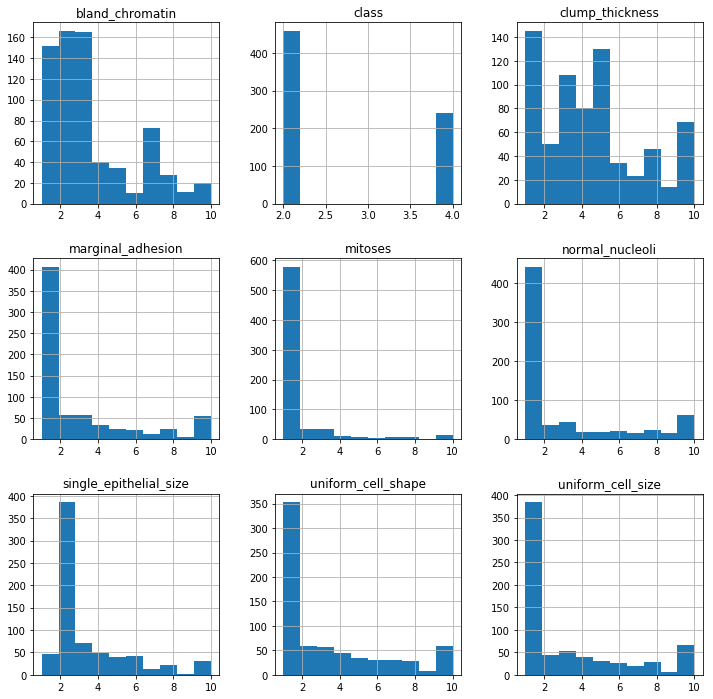

In [79]:
df.hist(figsize=(12,12))
plt.show()

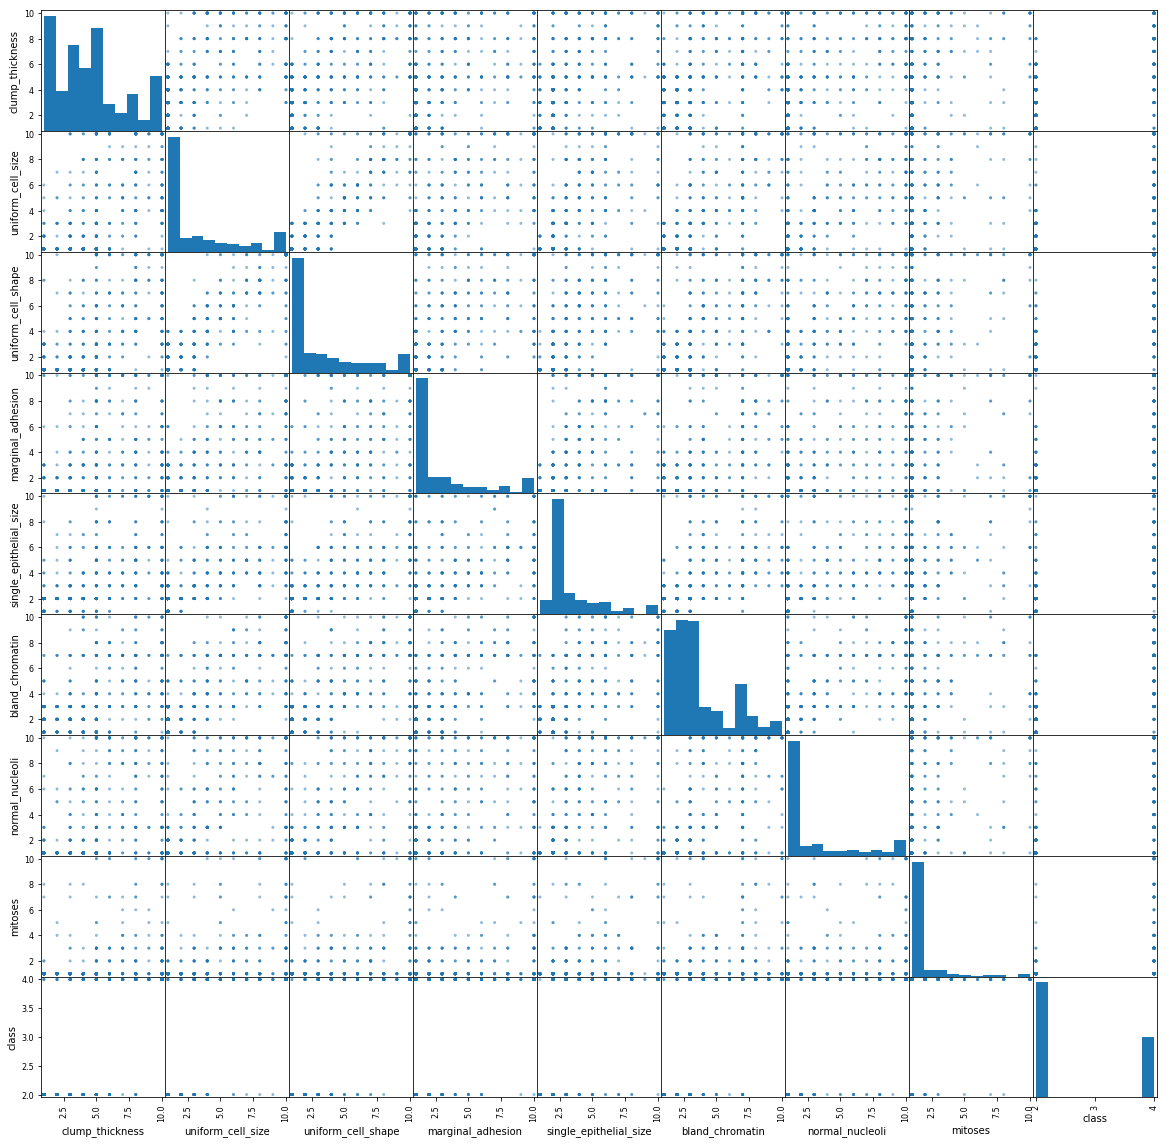

In [80]:
## most of data is lying in between 0 and 2



from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (20,20))
plt.show()

In [81]:
hm = df.corr()

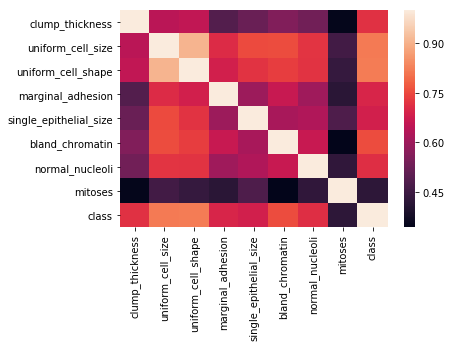

In [82]:
import seaborn as sns
sns.heatmap(hm)
plt.show()

In [83]:
## split the data into 2 parts
X = df.iloc[:,0:8]

In [84]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [85]:
Y = df.iloc[:,-1]

In [86]:
##print(X)


In [87]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.2)

In [88]:
## specify testing options
seed = 8
scoring = 'accuracy'

In [95]:
## define the model to train
from sklearn.neighbors import KNeighborsClassifier
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors= 5)))
models.append(('SVM', SVC()))

#print(models)

## evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = model_selection.cross_val_score(model , X_train, y_train, cv= 10)
    results.append(cv_results)
    names.append(names)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)





KNN: 0.967851 (0.015573)
SVM: 0.951711 (0.026582)


In [97]:
## make prediction on validation data

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9785714285714285
             precision    recall  f1-score   support

          2       0.99      0.98      0.98        85
          4       0.96      0.98      0.97        55

avg / total       0.98      0.98      0.98       140

SVM
0.9642857142857143
             precision    recall  f1-score   support

          2       1.00      0.94      0.97        85
          4       0.92      1.00      0.96        55

avg / total       0.97      0.96      0.96       140



In [91]:
df.isin(["?"]).sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64